In [67]:
import os

# Install the Kaggle API client
!pip install kaggle

# --- Instructions for setting up Kaggle API Key ---
# 1. Go to your Kaggle account (kaggle.com/your_username/account).
# 2. Click on 'Create New API Token' to download `kaggle.json`.
# 3. Upload this `kaggle.json` file to your Colab environment.
#    You can do this by clicking the 'Files' icon on the left sidebar,
#    then 'Upload to session storage' and selecting your `kaggle.json` file.
# 4. Run the following code to move the `kaggle.json` to the correct directory
#    and set appropriate permissions.

# Ensure the .kaggle directory exists
!mkdir -p ~/.kaggle

# Move the uploaded kaggle.json to the .kaggle directory
# Make sure you have uploaded the kaggle.json file to your Colab session files first
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API client installed and configured (assuming kaggle.json was uploaded).")
print("You can now use the Kaggle API. For example, to list datasets:")
print("!kaggle datasets list")

# Example: Downloading a specific dataset (uncomment and replace with desired dataset)
# !kaggle datasets download -d owner/dataset-name

# After downloading, you might need to unzip the file
# import zipfile
# with zipfile.ZipFile('dataset-name.zip', 'r') as zip_ref:
#     zip_ref.extractall('dataset_directory')


Kaggle API client installed and configured (assuming kaggle.json was uploaded).
You can now use the Kaggle API. For example, to list datasets:
!kaggle datasets list


In [68]:
import zipfile
import os

# Define the dataset path and name
dataset_path = "nelgiriyewithana/global-weather-repository"
dataset_name = dataset_path.split('/')[-1]

# Download the dataset
print(f"Downloading dataset: {dataset_path}")
!kaggle datasets download -d {dataset_path}

# Unzip the downloaded file
zip_file_name = f"{dataset_name}.zip"
if os.path.exists(zip_file_name):
    print(f"Unzipping {zip_file_name}...")
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(dataset_name) # Extract to a directory named after the dataset
    print(f"Dataset extracted to directory: {dataset_name}/")
    os.remove(zip_file_name) # Optionally remove the zip file after extraction
else:
    print(f"Error: {zip_file_name} not found. Download might have failed or file name is different.")

# List contents of the extracted directory to verify
print(f"Contents of {dataset_name}/:")
!ls {dataset_name}/



Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository
License(s): other
  0% 0.00/9.82M [00:00<?, ?B/s]
100% 9.82M/9.82M [00:00<00:00, 2.28GB/s]
Unzipping global-weather-repository.zip...
Dataset extracted to directory: global-weather-repository/
Contents of global-weather-repository/:
GlobalWeatherRepository.csv  state.db


## import- basic lib.


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df =  pd.read_csv('/content/global-weather-repository/GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124136 entries, 0 to 124135
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       124136 non-null  object 
 1   location_name                 124136 non-null  object 
 2   latitude                      124136 non-null  float64
 3   longitude                     124136 non-null  float64
 4   timezone                      124136 non-null  object 
 5   last_updated_epoch            124136 non-null  int64  
 6   last_updated                  124136 non-null  object 
 7   temperature_celsius           124136 non-null  float64
 8   temperature_fahrenheit        124136 non-null  float64
 9   condition_text                124136 non-null  object 
 10  wind_mph                      124136 non-null  float64
 11  wind_kph                      124136 non-null  float64
 12  wind_degree                   124136 non-nul

In [72]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,124136.000000,124136.000000,1.241360e+05,124136.000000,124136.000000,124136.000000,124136.000000,124136.000000,124136.000000,124136.000000,...,124136.000000,124136.000000,124136.000000,124136.000000,124136.000000,124136.000000,124136.000000,124136.000000,124136.000000,124136.000000
mean,19.193085,21.992858,1.743471e+09,21.633843,70.942661,8.070967,12.992551,169.241018,1014.059290,29.944516,...,18.309223,477.583492,58.989835,15.275060,10.698594,24.622462,49.249932,1.710841,2.635875,49.838677
std,24.426646,65.792707,1.593454e+07,9.566241,17.219092,7.379596,11.873256,103.430657,10.630259,0.313872,...,14.015566,784.126354,31.161792,24.319822,37.049426,37.901198,152.015649,0.950965,2.473284,34.979745
min,-41.300000,-175.200000,1.715849e+09,-29.800000,-21.600000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.729676e+09,16.300000,61.300000,4.000000,6.500000,80.000000,1010.000000,29.830000,...,10.400000,212.000000,39.000000,1.650000,1.050000,7.121000,10.050000,1.000000,1.000000,15.000000
50%,17.250000,23.240000,1.743500e+09,24.100000,75.400000,6.900000,11.200000,162.000000,1014.000000,29.930000,...,15.500000,303.400000,56.000000,5.450000,2.450000,14.250000,20.350000,1.000000,2.000000,50.000000
75%,40.400000,50.580000,1.757231e+09,28.100000,82.600000,11.000000,17.600000,256.000000,1018.000000,30.060000,...,24.300000,473.850000,75.000000,17.760000,8.650000,28.120000,42.200000,2.000000,3.000000,84.000000
max,64.150000,179.220000,1.771056e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


In [73]:
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [74]:
df['last_updated']  =  pd.to_datetime(df['last_updated'])
df['month'] =   df['last_updated'].dt.month
df['hour']= df['last_updated'].dt.hour
df.drop('last_updated', axis=1, inplace=True)

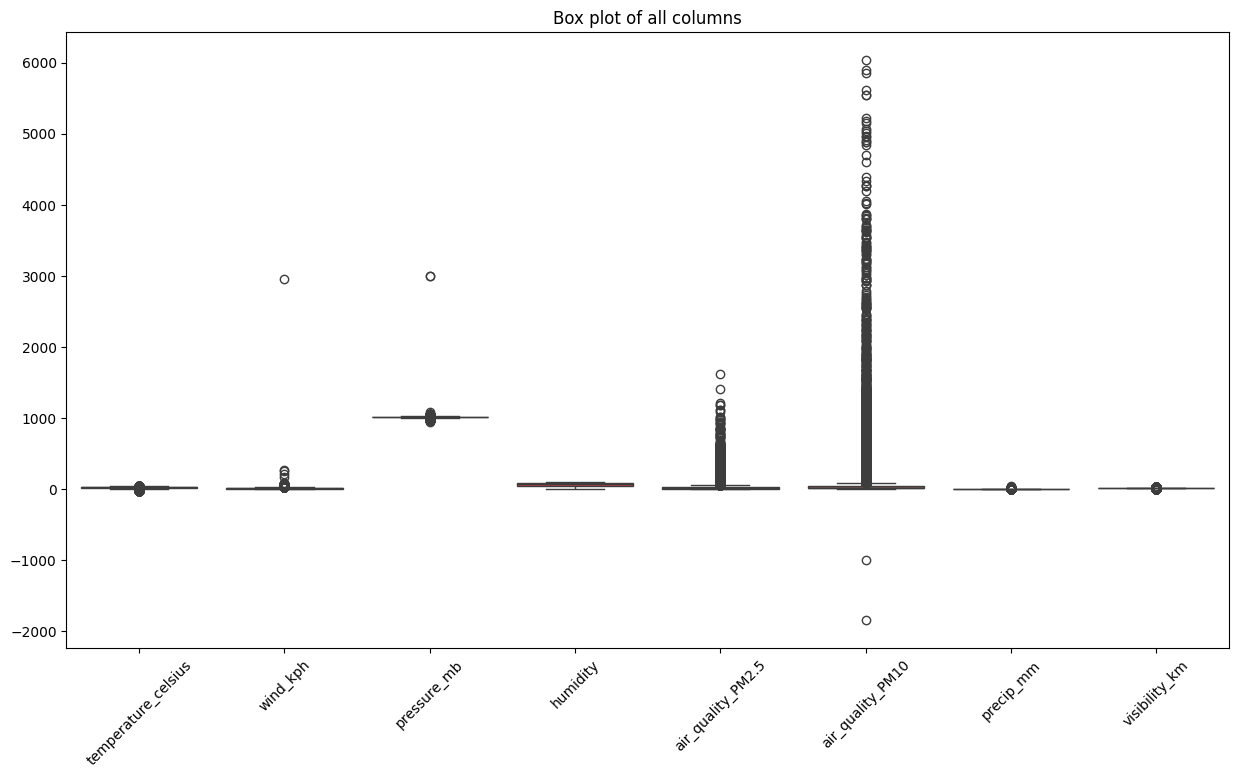

In [75]:
# checking outliars

cols =  [
    'temperature_celsius',
    'wind_kph',
    'pressure_mb',
    'humidity',
    'air_quality_PM2.5',
    'air_quality_PM10',
    'precip_mm',
    'visibility_km'
]
df_select = df[cols]
plt.figure(figsize=(15,8))
sns.boxplot(data=df_select)
plt.xticks(rotation=45)
plt.title("Box plot of all columns")
plt.show()

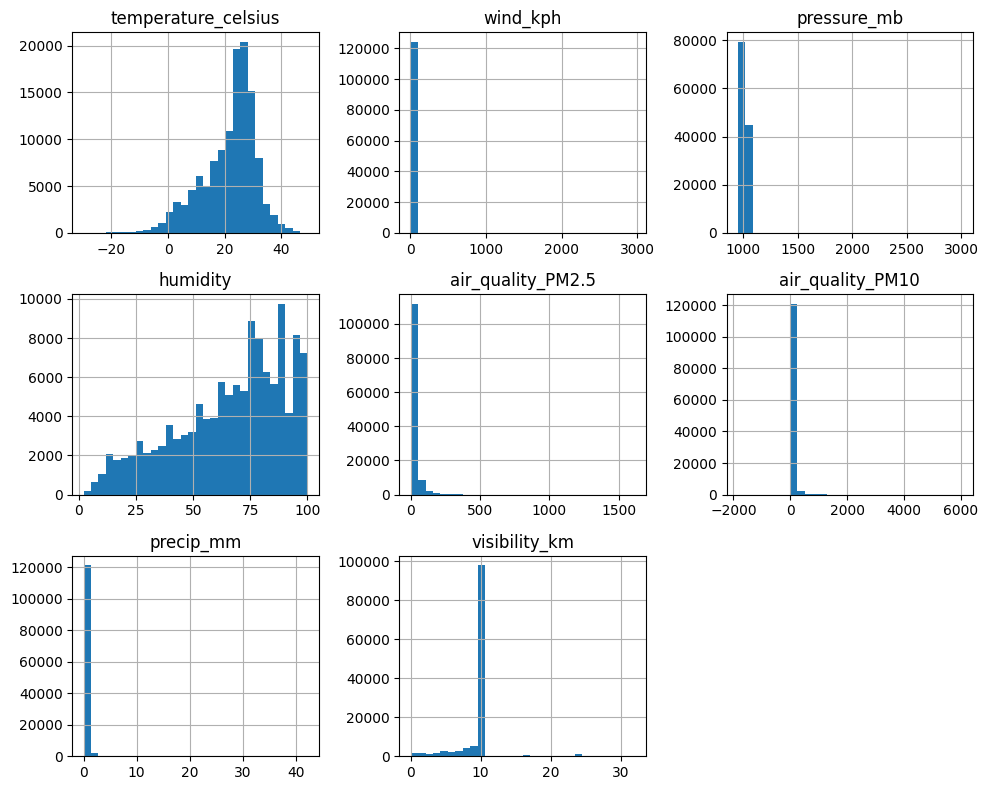

In [76]:
df_select.hist(figsize=(10,8), bins=30)
plt.tight_layout()
plt.show()

## Scatter plot


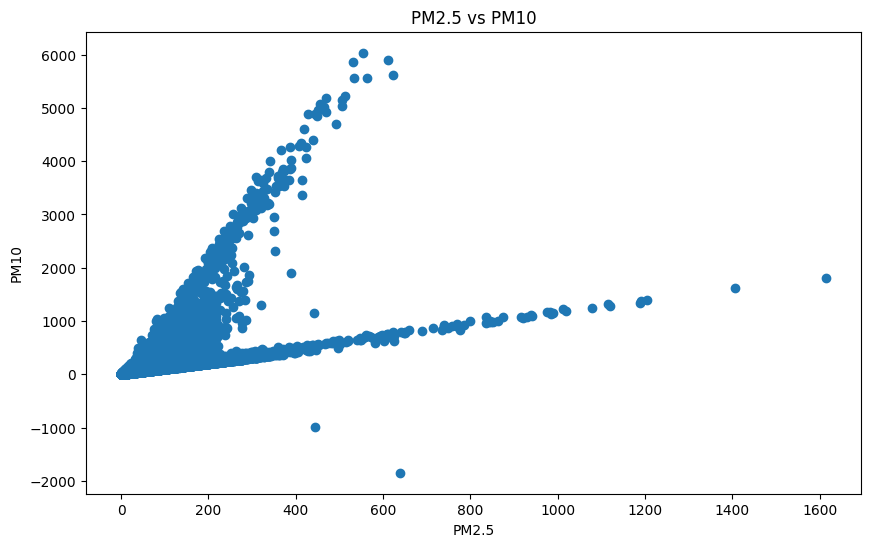

In [77]:
# PM2.5 vs PM10
plt.figure(figsize=(10,6))
plt.scatter(df['air_quality_PM2.5'], df['air_quality_PM10'])
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('PM2.5 vs PM10')
plt.show()

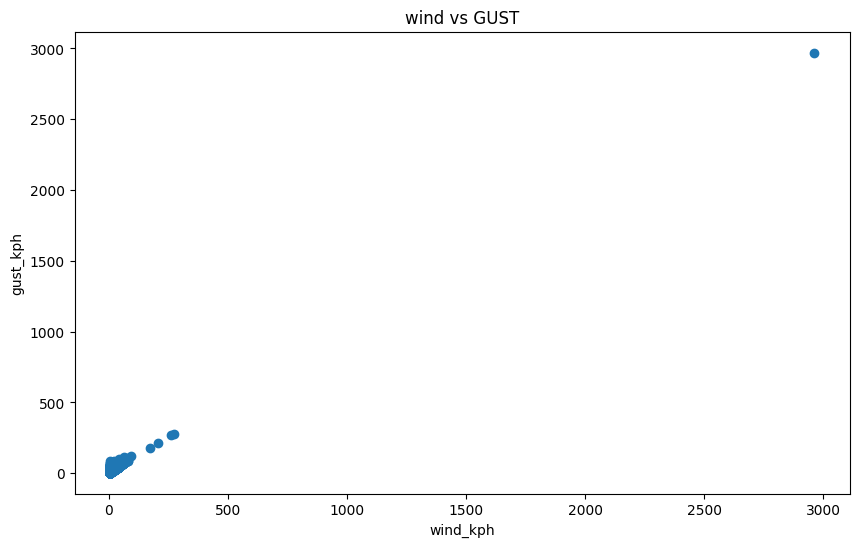

In [78]:
# wind vs GUST
plt.figure(figsize=(10,6))
plt.scatter(df['wind_kph'], df['gust_kph'])
plt.xlabel("wind_kph")
plt.ylabel("gust_kph")
plt.title("wind vs GUST")
plt.show()

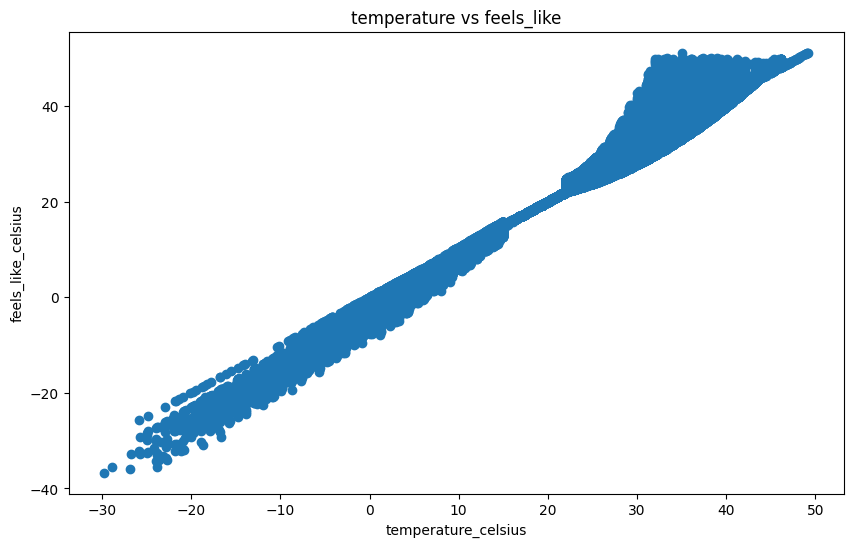

In [79]:
# temperature vs feels like
plt.figure(figsize=(10,6))
plt.scatter(df['temperature_celsius'], df['feels_like_celsius'])
plt.xlabel("temperature_celsius")
plt.ylabel("feels_like_celsius")
plt.title("temperature vs feels_like")
plt.show()

In [80]:
# IQR METHOD
Q1 =  df['temperature_celsius'].quantile(0.25)
Q3 =  df['temperature_celsius'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound)
print(upper_bound)

-1.4000000000000021
45.800000000000004


In [81]:
outliars = df[
    (df['temperature_celsius']<lower_bound) |
    (df['temperature_celsius']>upper_bound)
]
print("Number of Outliers", outliars.shape[0])

Number of Outliers 2575


In [82]:
df_clean =  df[
    (df['temperature_celsius'] >= lower_bound) &
    (df['temperature_celsius'] <= upper_bound)
]

In [83]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[(df[col] >= lower) & (df[col] <= upper)]

print("Shape after removing outliers:", df.shape)


/tmp/ipython-input-1874810306.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df[col] >= lower) & (df[col] <= upper)]
/tmp/ipython-input-1874810306.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df[col] >= lower) & (df[col] <= upper)]
/tmp/ipython-input-1874810306.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df[col] >= lower) & (df[col] <= upper)]
/tmp/ipython-input-1874810306.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df[col] >= lower) & (df[col] <= upper)]
/tmp/ipython-input-1874810306.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df[col] >= lower) & (df[col] <= upper)]


Shape after removing outliers: (124136, 42)


/tmp/ipython-input-1874810306.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df[col] >= lower) & (df[col] <= upper)]
/tmp/ipython-input-1874810306.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df[col] >= lower) & (df[col] <= upper)]
/tmp/ipython-input-1874810306.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df[col] >= lower) & (df[col] <= upper)]


# Perfrom eda


In [84]:
df_clean['condition_text'].value_counts()

,count
condition_text,
Sunny,24490
Partly cloudy,21518
Partly Cloudy,6027
Patchy rain nearby,5628
Clear,4350
Overcast,2727
Cloudy,1111
Light rain,706
Mist,447


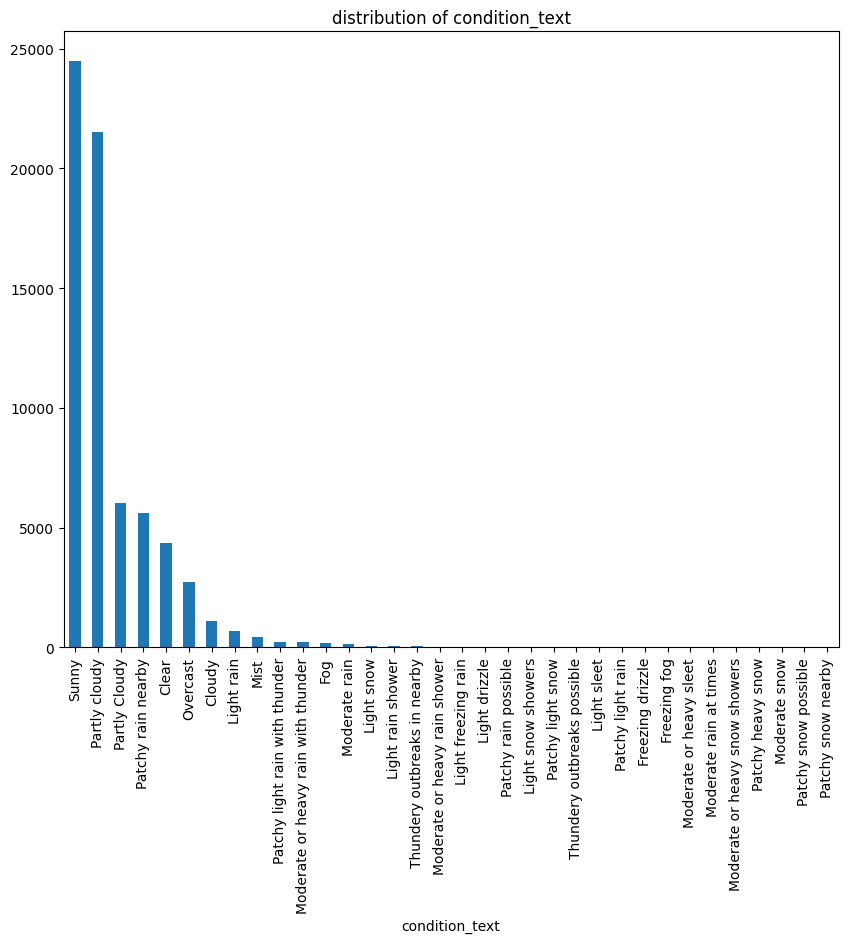

In [85]:
# target distribution
plt.figure(figsize=(10,8))
df_clean['condition_text'].value_counts().plot(kind='bar')
plt.title("distribution of condition_text")
plt.xticks(rotation=90)
plt.show()

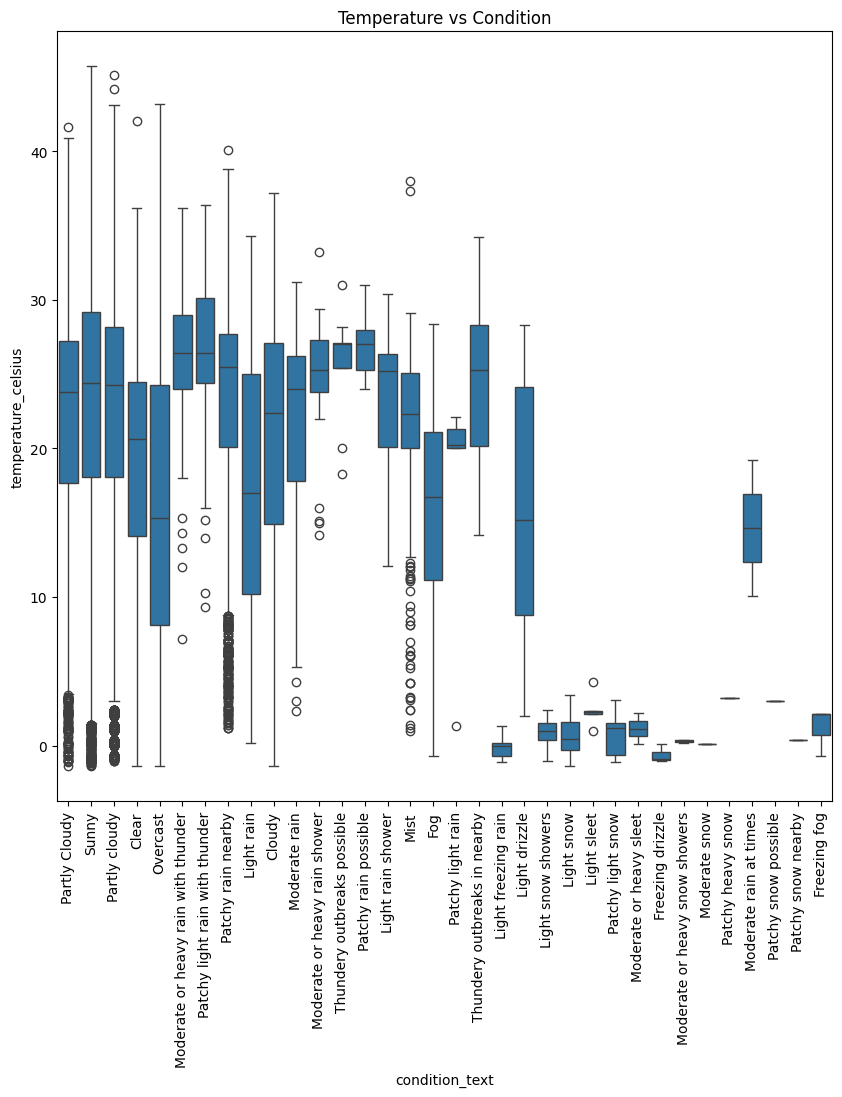

In [86]:
# Temperature vs Condition
plt.figure(figsize=(10,10))
sns.boxplot(x='condition_text', y='temperature_celsius', data = df_clean)
plt.xticks(rotation=90)
plt.title("Temperature vs Condition")
plt.show()

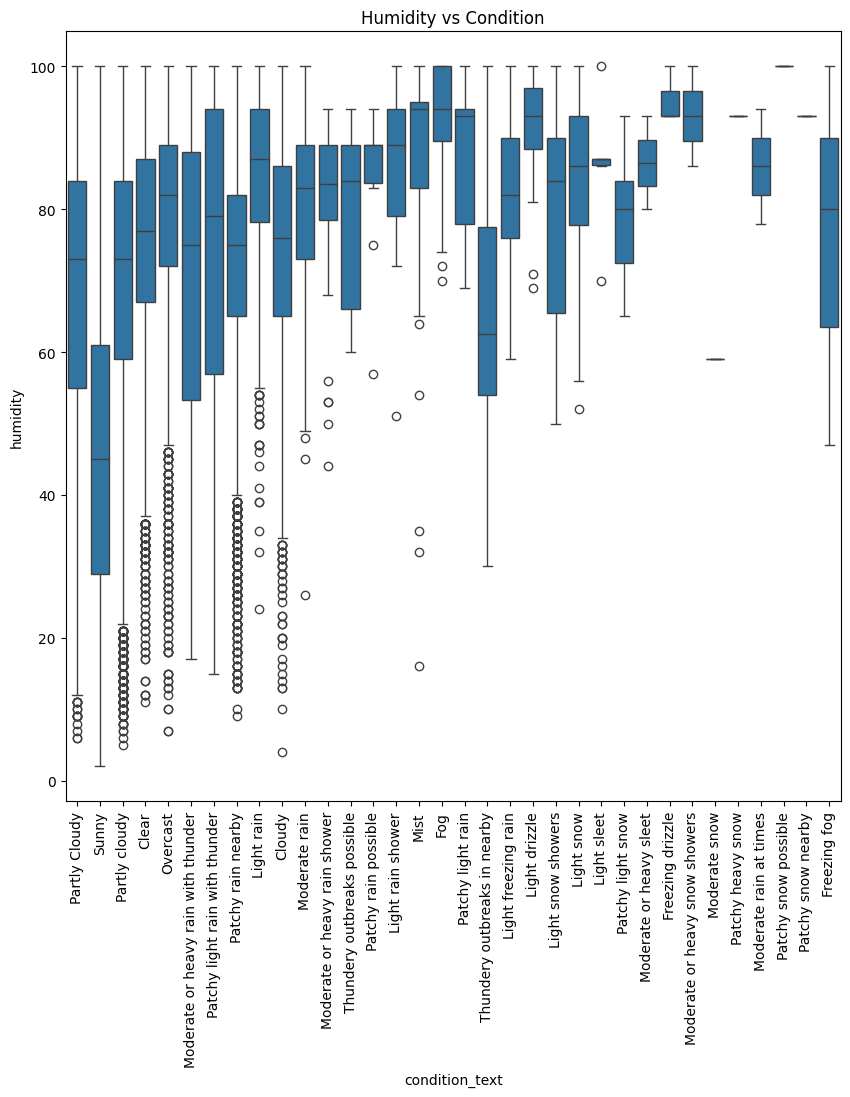

In [87]:
# humidity vs Condition
plt.figure(figsize=(10,10))
sns.boxplot(
    x='condition_text',
    y='humidity',
    data=df_clean
)
plt.xticks(rotation=90)
plt.title("Humidity vs Condition")
plt.show()

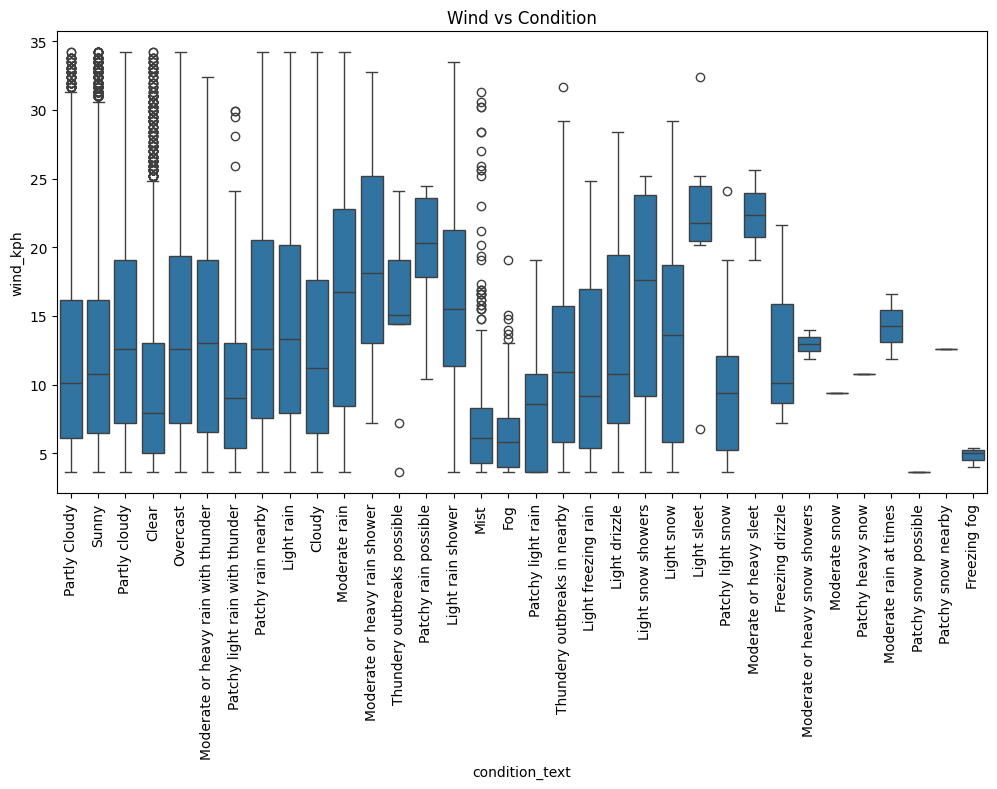

In [88]:
# wind vs condition
plt.figure(figsize=(12,6))
sns.boxplot(
    x='condition_text',
    y='wind_kph',
    data=df_clean)
plt.xticks(rotation=90)
plt.title("Wind vs Condition")
plt.show()

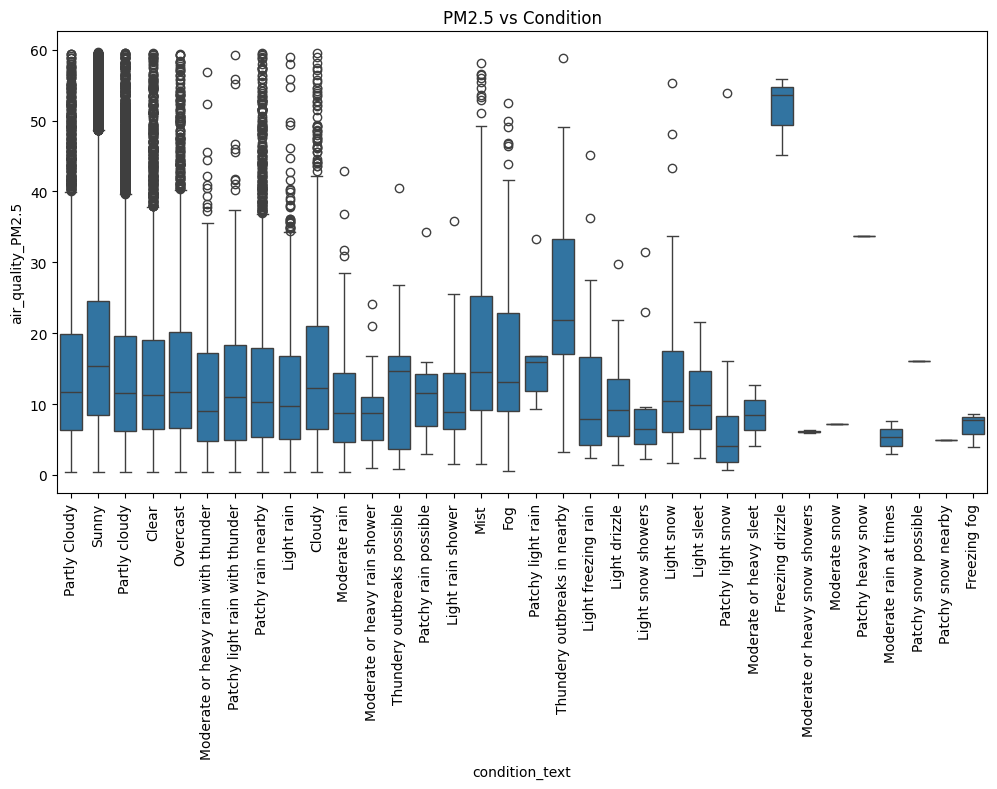

In [89]:
# PM2.5 vs Condition
plt.figure(figsize=(12,6))
sns.boxplot(
    x='condition_text',
    y='air_quality_PM2.5',
    data=df_clean)
plt.xticks(rotation=90)
plt.title("PM2.5 vs Condition")
plt.show()

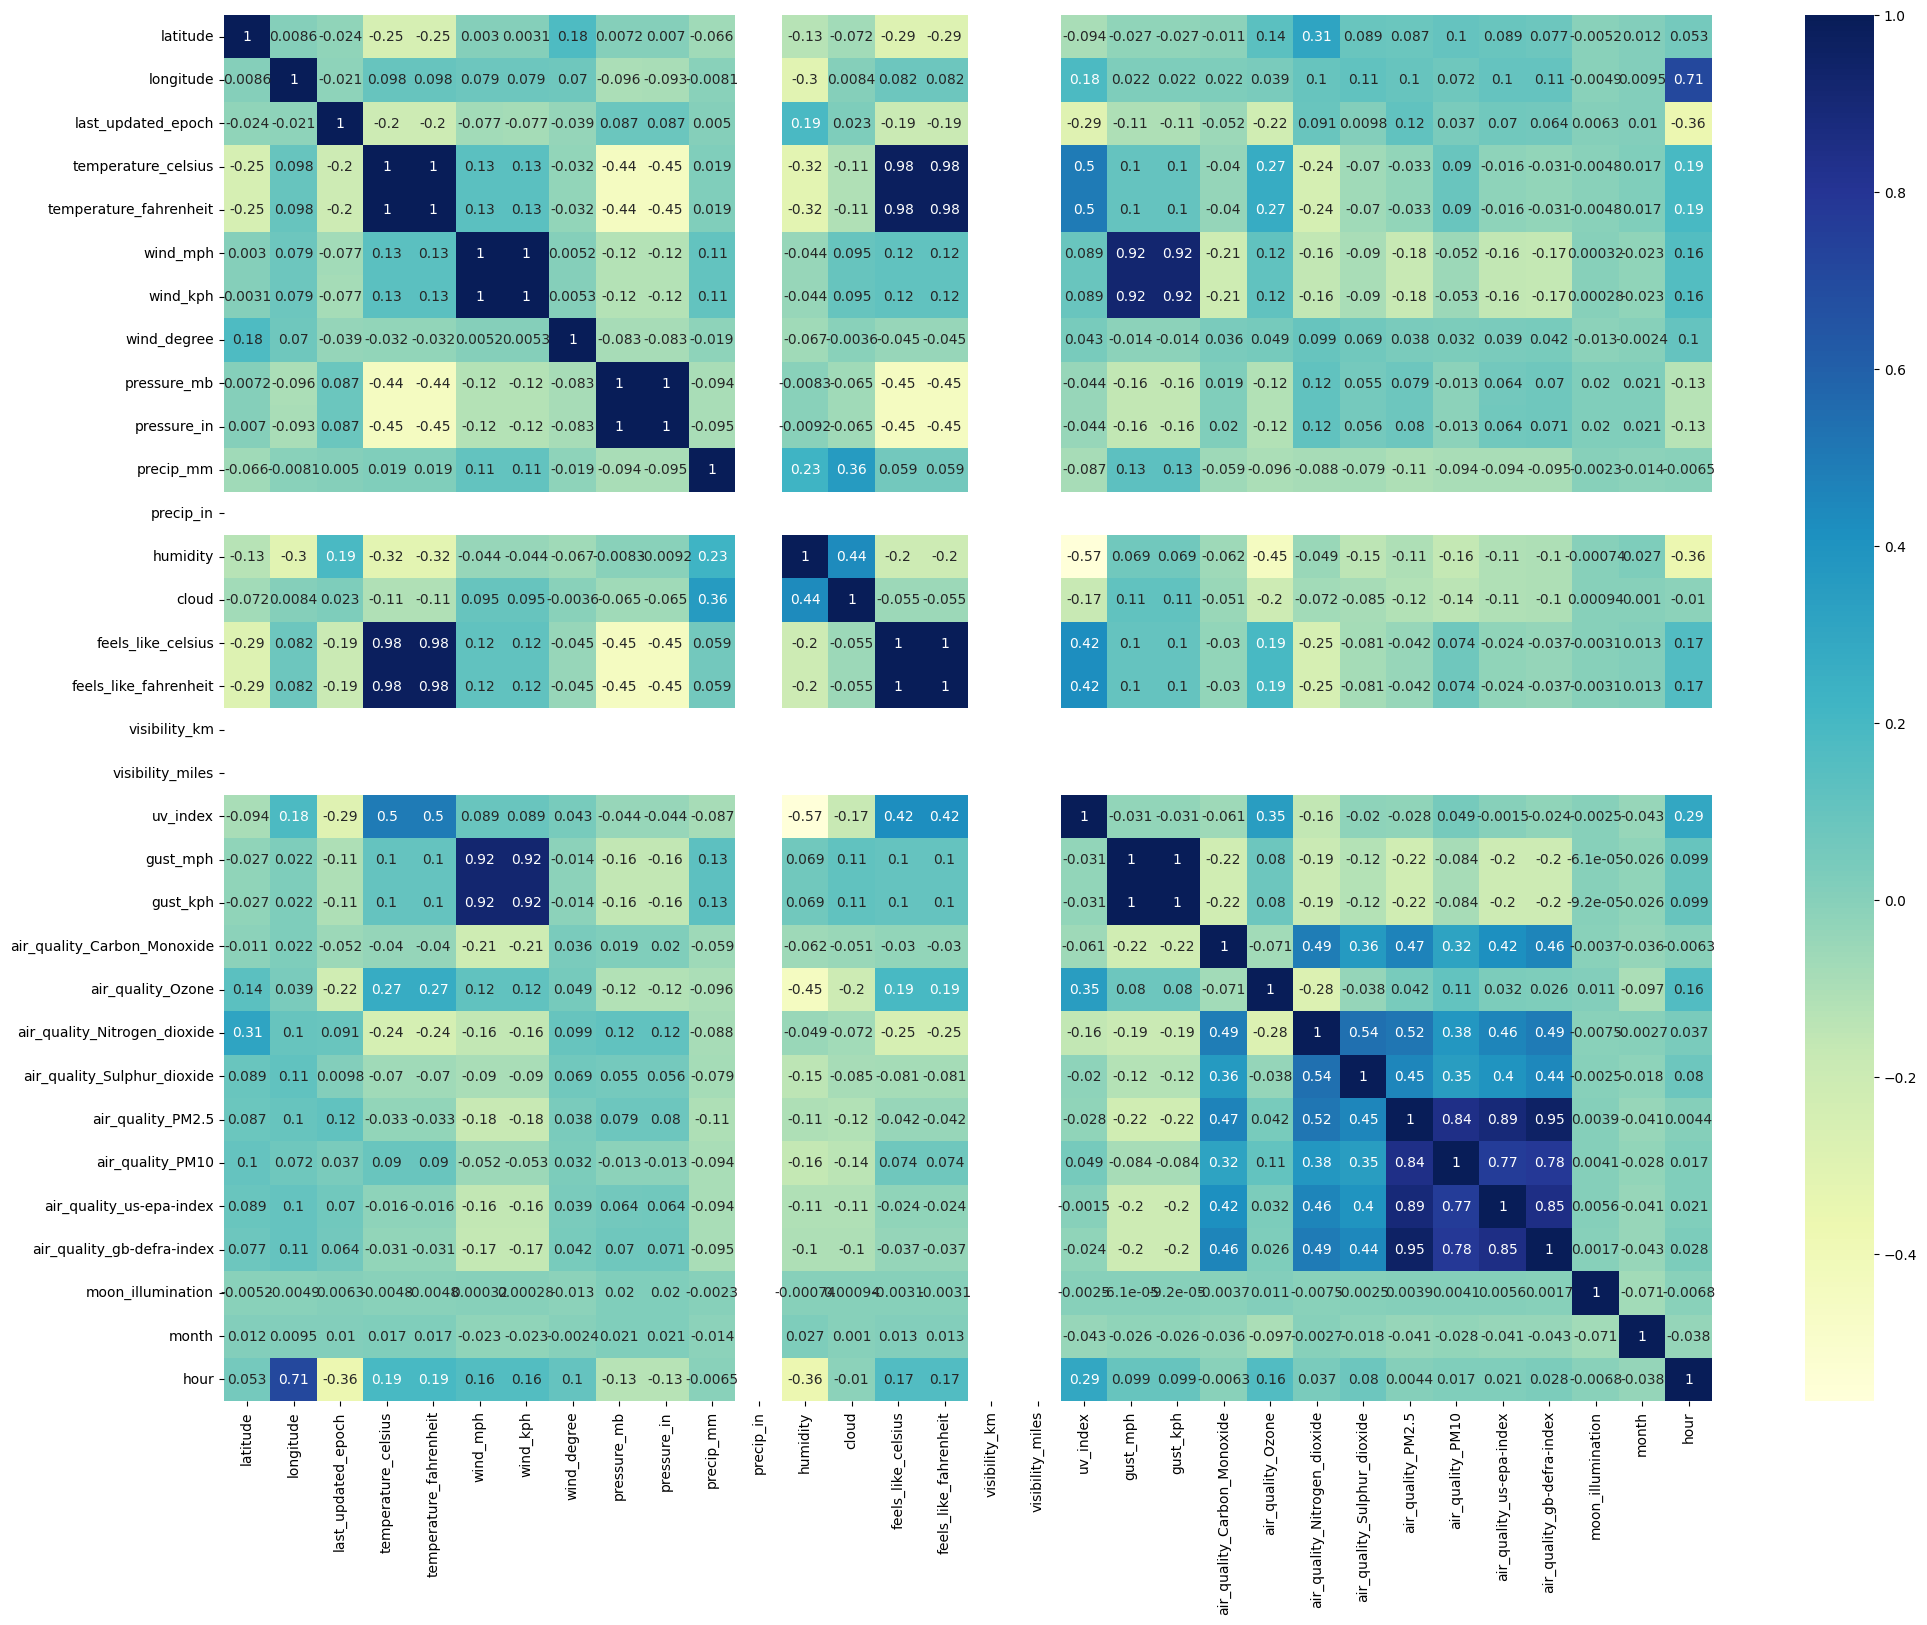

In [90]:
plt.figure(figsize=(24, 18))
co_mtx = df_clean.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

In [91]:
df['condition_text'] = df['condition_text'].replace('Partly cloudy', 'Partly Cloudy')
df = df[df['condition_text'] != 'Patchy snow possible']

In [92]:
df['condition_text'].value_counts().sort_index()

,count
condition_text,
Blizzard,7
Blowing snow,31
Clear,6106
Cloudy,1382
Fog,1491
Freezing drizzle,5
Freezing fog,201
Heavy freezing drizzle,1
Heavy rain,58


In [93]:
df_clean.drop(columns=['country'], inplace=True)
df_clean.drop(columns=['timezone'], inplace=True)
df_clean.drop(columns=['moon_phase'], inplace=True)
df_clean.drop(columns=['sunrise'], inplace=True)
df_clean.drop(columns=['sunset'], inplace=True)
df_clean.drop(columns=['moonrise'], inplace=True)
df_clean.drop(columns=['moonset'], inplace=True)
df_clean.drop(columns=['moon_illumination'], inplace=True)
df_clean.drop(columns=['last_updated_epoch'], inplace=True)
df_clean.drop(columns=['location_name'], inplace=True)
df_clean.drop(columns=['temperature_fahrenheit'], inplace=True)
df_clean.drop(columns=['wind_mph'], inplace=True)
df_clean.drop(columns=['wind_direction'], inplace=True)
df_clean.drop(columns=['pressure_in'], inplace=True)
df_clean.drop(columns=['precip_in'], inplace=True)
df_clean.drop(columns=['feels_like_fahrenheit'], inplace=True)
df_clean.drop(columns=['visibility_miles'], inplace=True)
df_clean.drop(columns=['gust_mph'], inplace=True)
df_clean.drop(columns=['air_quality_us-epa-index'], inplace=True)
df_clean.drop(columns=['feels_like_celsius'], inplace=True)
df_clean.drop(columns=["gust_kph"], inplace=True)
df_clean.drop(columns=["air_quality_PM2.5"], inplace=True)
df_clean.drop(columns=["air_quality_gb-defra-index"], inplace=True)



In [94]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68071 entries, 0 to 124135
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      68071 non-null  float64
 1   longitude                     68071 non-null  float64
 2   temperature_celsius           68071 non-null  float64
 3   condition_text                68071 non-null  object 
 4   wind_kph                      68071 non-null  float64
 5   wind_degree                   68071 non-null  int64  
 6   pressure_mb                   68071 non-null  float64
 7   precip_mm                     68071 non-null  float64
 8   humidity                      68071 non-null  int64  
 9   cloud                         68071 non-null  int64  
 10  visibility_km                 68071 non-null  float64
 11  uv_index                      68071 non-null  float64
 12  air_quality_Carbon_Monoxide   68071 non-null  float64
 13  air_q

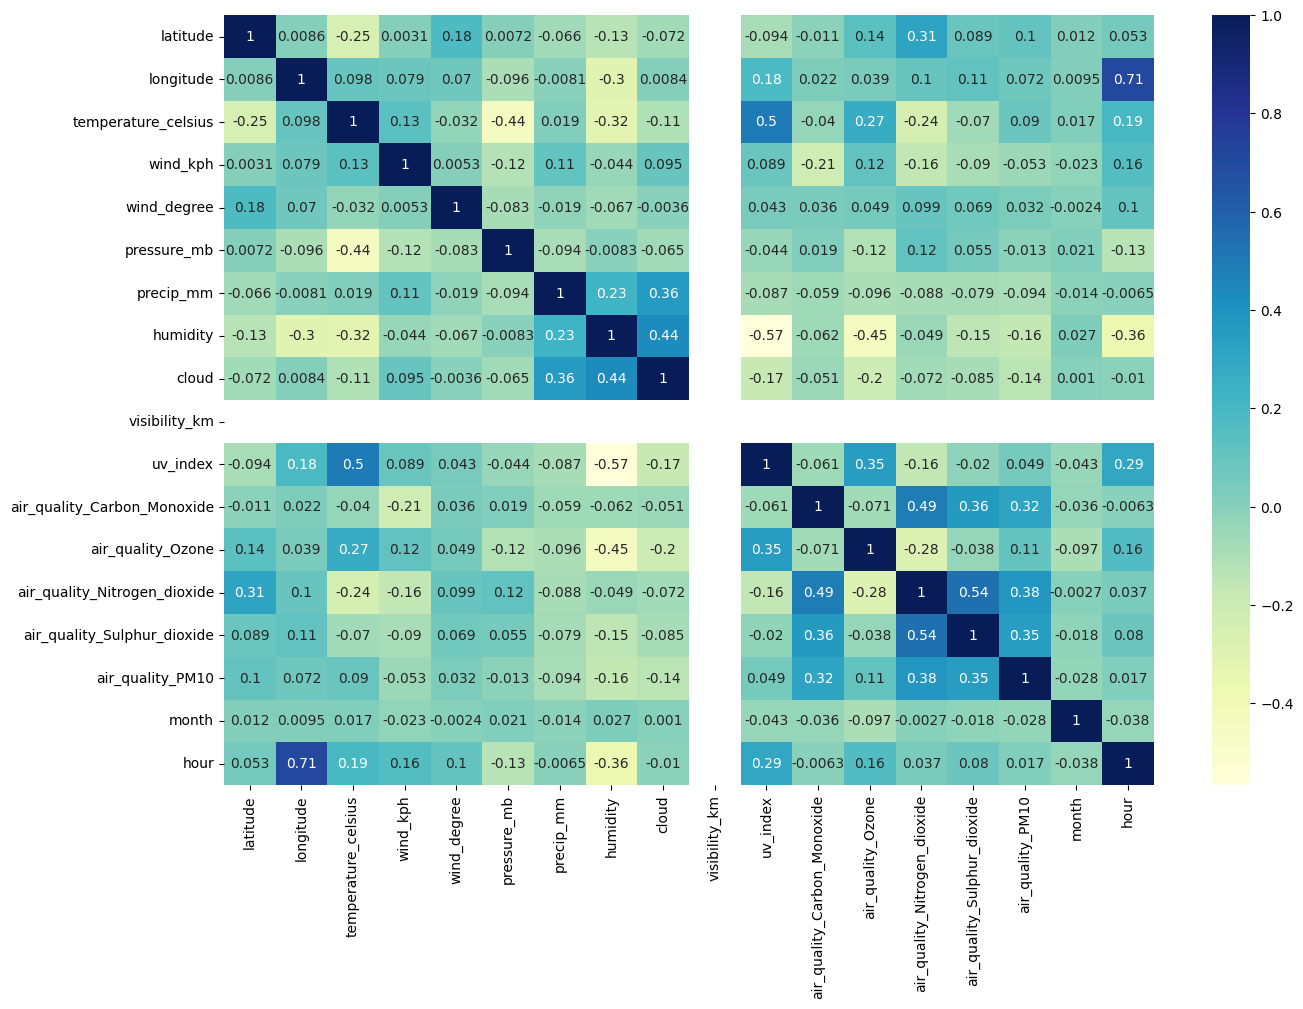

In [95]:
plt.figure(figsize=(15, 10))
co_mtx = df_clean.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

In [96]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

# Re-encode target AFTER cleaning
le = LabelEncoder()
df_clean['condition_encoded'] = le.fit_transform(df_clean['condition_text'])

# Define X and y again
X = df_clean.drop(columns=['condition_text','condition_encoded'])
y = df_clean['condition_encoded']


In [97]:
print(sorted(y.unique()))
print("Number of classes:", len(y.unique()))


[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33)]
Number of classes: 34


In [98]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Re-define X and y again
X = df_clean.drop(columns=['condition_text','condition_encoded'])
y = df_clean['condition_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# logistic Regression


In [99]:
from sklearn.linear_model import  LogisticRegression
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model
log_model =  LogisticRegression()
log_model.fit(X_train_scaled, y_train)

#Prediction
y_pred_log = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.6999632757987514
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       892
           1       0.00      0.00      0.00       231
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00       148
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         2
          10       0.50      0.20      0.29        10
          11       0.00      0.00      0.00         4
          12       0.29      0.02      0.04        99
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        44
          17       0.00      0.00      0.00        32
          20       0.82      0.41      0.55       546
          21       0.42      0.2

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

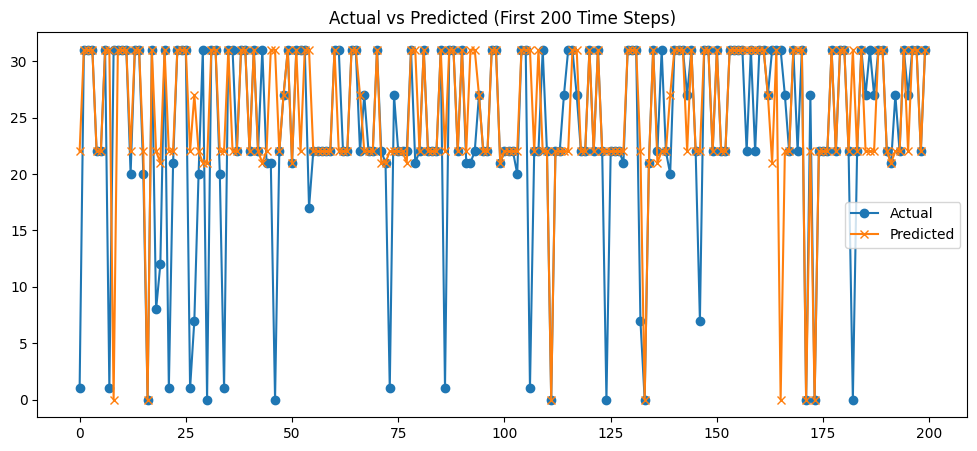

In [100]:
# Actual vs Logistic Regression
plt.figure(figsize=(12,5))

plt.plot(y_test.values[:200], label="Actual", marker='o')
plt.plot(y_pred_log[:200], label="Predicted", marker='x')

plt.legend()
plt.title("Actual vs Predicted (First 200 Time Steps)")
plt.show()

# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt_model =  DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("DT-classification_Rpt",classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8543518178479618
DT-classification_Rpt               precision    recall  f1-score   support

           0       0.85      0.82      0.83       892
           1       0.69      0.68      0.68       231
           2       0.17      0.17      0.17        40
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.33      0.33      0.33         3
           7       0.04      0.04      0.04       148
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         2
          10       0.40      0.40      0.40        10
          11       0.00      0.00      0.00         4
          12       0.36      0.35      0.36        99
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        44
          16       0.00      0.00      0.00         0
          17       0.04      0.06      0.05        32
          18    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

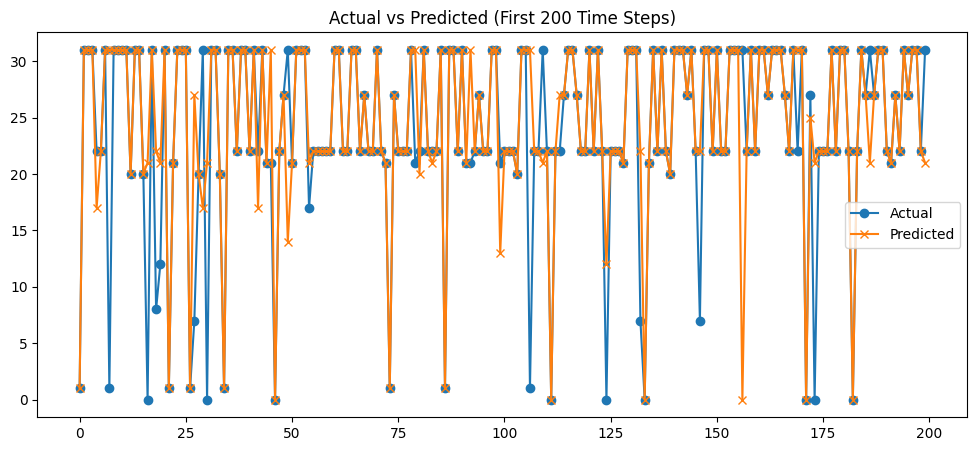

In [102]:
# Actual vs Decision Tree model
plt.figure(figsize=(12,5))

plt.plot(y_test.values[:200], label="Actual", marker='o')
plt.plot(y_pred_dt[:200], label="Predicted", marker='x')

plt.legend()
plt.title("Actual vs Predicted (First 200 Time Steps)")
plt.show()

# Random Forest


In [103]:
from sklearn.ensemble import RandomForestClassifier

rf_model =  RandomForestClassifier(random_state=42,
                                   n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF-classification_Rpt",classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9020932794711715
RF-classification_Rpt               precision    recall  f1-score   support

           0       0.87      0.90      0.88       892
           1       0.93      0.47      0.63       231
           2       0.53      0.20      0.29        40
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.25      0.01      0.01       148
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         2
          10       1.00      0.20      0.33        10
          11       0.00      0.00      0.00         4
          12       0.57      0.36      0.44        99
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        44
          17       0.00      0.00      0.00        32
          20       0.87      0.71      0.78       546
          21    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


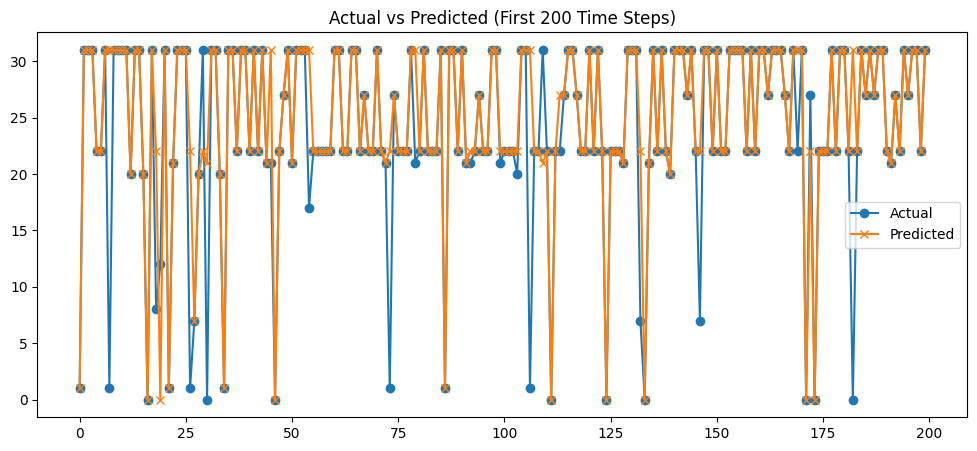

In [104]:
# Actual vs rf_model pred
plt.figure(figsize=(12,5))

plt.plot(y_test.values[:200], label="Actual", marker='o')
plt.plot(y_pred_rf[:200], label="Predicted", marker='x')

plt.legend()
plt.title("Actual vs Predicted (First 200 Time Steps)")
plt.show()



In [105]:
print("Logistic:", accuracy_score(y_test, y_pred_log))
print("Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))

Logistic: 0.6999632757987514
Decision Tree: 0.8543518178479618
Random Forest: 0.9020932794711715


## TimeSeries

In [106]:
df_ts = pd.read_csv('/content/global-weather-repository/GlobalWeatherRepository.csv')

# convert  to datetime
df_ts['last_updated'] =  pd.to_datetime(df_ts['last_updated'])

# Choose one location
df_city =  df_ts[df_ts['location_name']== df_ts['location_name'].iloc[0]]
# sort by time
df_city =  df_city.sort_values('last_updated')

# set time index
df_city.set_index('last_updated', inplace=True)

df_city.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,
2024-05-16 13:15:00,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,26.6,79.8,Partly Cloudy,8.3,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
2024-05-16 18:30:00,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715868000,22.0,71.6,Patchy rain nearby,4.5,...,9.4,18.9,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
2024-05-17 20:30:00,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715961600,15.0,58.9,Patchy rain nearby,3.4,...,8.3,18.1,1,1,04:49 AM,06:51 PM,01:09 PM,01:37 AM,Waxing Gibbous,64
2024-05-18 19:00:00,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1716042600,19.5,67.1,Clear,2.2,...,7.5,15.3,1,1,04:48 AM,06:51 PM,02:04 PM,02:00 AM,Waxing Gibbous,73
2024-05-19 18:30:00,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1716127200,16.9,62.4,Patchy rain nearby,4.0,...,4.8,10.1,1,1,04:48 AM,06:52 PM,03:00 PM,02:22 AM,Waxing Gibbous,81


In [107]:
sereis =  df_city['temperature_celsius']


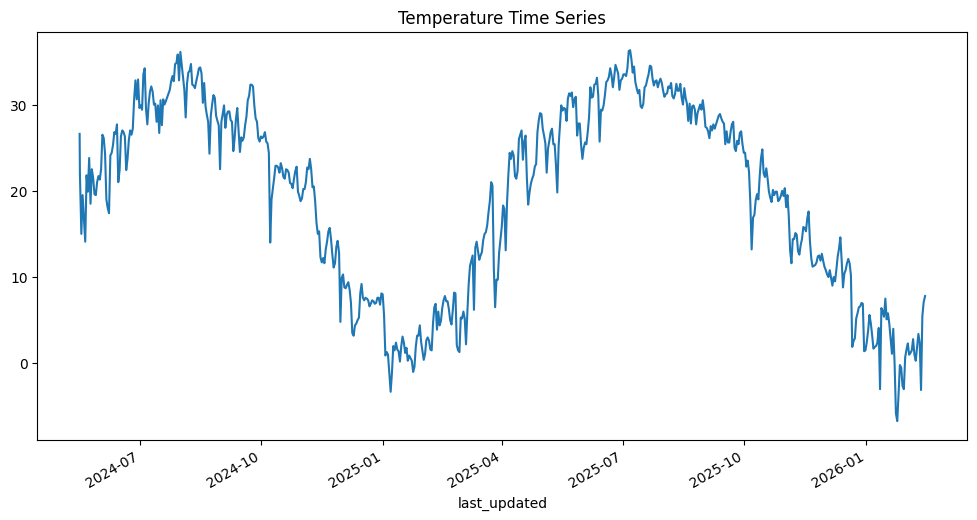

In [108]:
plt.figure(figsize=(12,6))
sereis.plot()
plt.title("Temperature Time Series")
plt.show()


In [109]:
train =  sereis[:-24]
test =  sereis[-24:]

In [110]:
from statsmodels.tsa.arima.model import ARIMA
model =  ARIMA(train, order=(5,1,0))
model_fit =  model.fit()
print(model_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     temperature_celsius   No. Observations:                  614
Model:                  ARIMA(5, 1, 0)   Log Likelihood               -1298.345
Date:                 Sat, 14 Feb 2026   AIC                           2608.689
Time:                         16:55:13   BIC                           2635.199
Sample:                              0   HQIC                          2618.999
                                 - 614                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1292      0.028     -4.612      0.000      -0.184      -0.074
ar.L2         -0.1177      0.043     -2.725      0.006      -0.202      -0.033
ar.L3         -0.1488      0.037     -3.975 

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [111]:
forecast = model_fit.forecast(steps=24)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


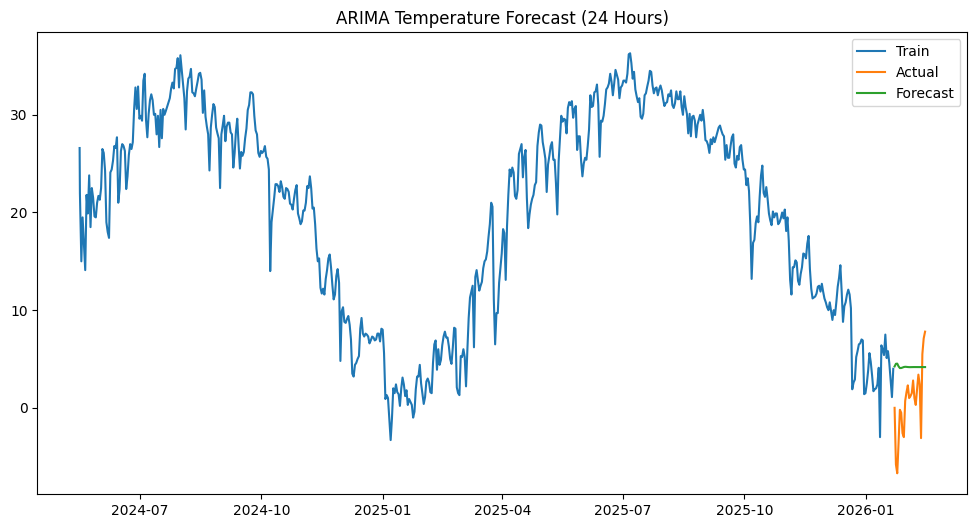

In [112]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.title("ARIMA Temperature Forecast (24 Hours)")
plt.show()


In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("ARIMA MAE:", mae)
print("ARIMA RMSE:", rmse)


ARIMA MAE: 4.230894554556856
ARIMA RMSE: 5.0353023220588895


In [114]:
from prophet import Prophet
df_prophet =  df_city.reset_index()[['last_updated', 'temperature_celsius']]
df_prophet.columns = ['ds', 'y']
df_prophet.head()

,ds,y
0,2024-05-16 13:15:00,26.6
1,2024-05-16 18:30:00,22.0
2,2024-05-17 20:30:00,15.0
3,2024-05-18 19:00:00,19.5
4,2024-05-19 18:30:00,16.9


In [115]:
model_prophet = Prophet()
model_prophet.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [116]:
future = model_prophet.make_future_dataframe(periods=24, freq='H')
forecast_prophet = model_prophet.predict(future)


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1875: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


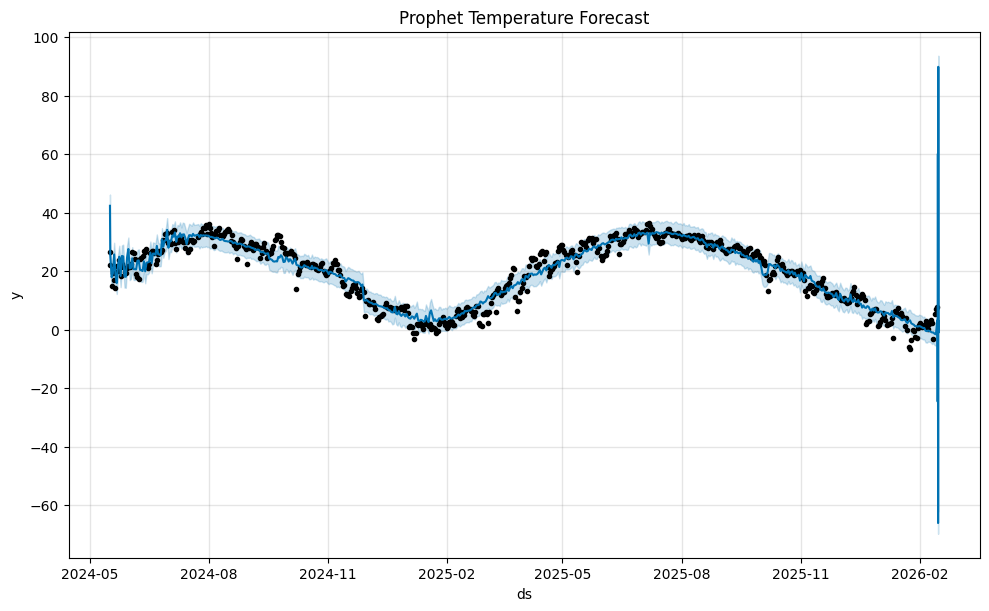

In [117]:
model_prophet.plot(forecast_prophet)
plt.title("Prophet Temperature Forecast")
plt.show()


In [118]:
forecast_24 = forecast_prophet.tail(24)['yhat'].values

mae_prophet = mean_absolute_error(test, forecast_24)
rmse_prophet = np.sqrt(mean_squared_error(test, forecast_24))

print("Prophet MAE:", mae_prophet)
print("Prophet RMSE:", rmse_prophet)


Prophet MAE: 28.927274230373953
Prophet RMSE: 39.288943901921485


# Actual vs TimeSeries model


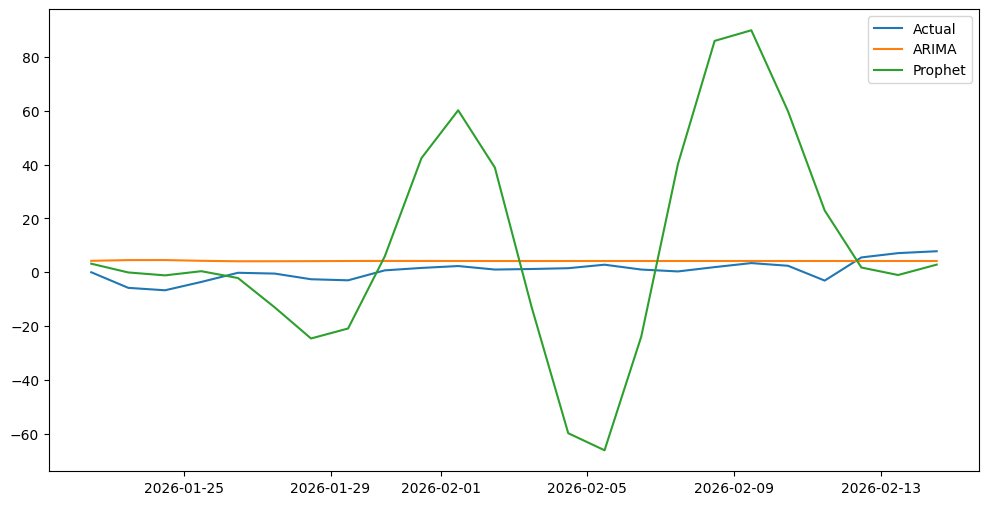

In [119]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="ARIMA")
plt.plot(test.index, forecast_24, label="Prophet")
plt.legend()
plt.show()
